<a href="https://colab.research.google.com/github/AlkaidCheng/quple.github.io/blob/master/examples/Circuit_Descriptors_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circuit Descriptors

Circuits descriptors for a parameterized quantum circuit (PQC) are quantities that describe a certain properties of the circuit.

In [1]:
!pip install  quple

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 1.4MB 42.8MB/s 
     |████████████████████████████████| 3.9MB 42.9MB/s 
     |████████████████████████████████| 450kB 30.7MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 3.9MB 40.5MB/s 
     |████████████████████████████████| 163kB 47.2MB/s 
     |████████████████████████████████| 112kB 46.1MB/s 
     |████████████████████████████████| 133kB 47.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=70dd183fa3ffb485af337436939aaa90c28363ff443e80126bd101b1279c4b3d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for pathos: filename=pathos-0.2.5-cp36-none-any.whl size=77577 sha256=82e57e359b48aa8eed2f937420768408eb3b882dfa4a8be6519614f26742b48a
  Stored in directory: /root/.cache/pip/

In [1]:
# import dependencies
import quple

In [2]:
from quple.circuits.variational_circuits import RealAmplitudes
# construct an example pqc
n_qubit = 5
# define a parameterised circuit
pqc = RealAmplitudes(n_qubit)
# print out the circuit diagram
print(pqc)

                                 ┌──┐       ┌──┐                                   ┌──┐       ┌──┐
(0, 0): ───Ry(θ_0)───@───@───@────@────────────────────Ry(θ_5)───@─────────@───@────@────────────────────Ry(θ_10)──────────────
                     │   │   │    │                              │         │   │    │
(0, 1): ───Ry(θ_1)───X───┼───┼────┼@────@────@─────────Ry(θ_6)───X─────────┼───┼────┼@────@────@─────────Ry(θ_11)──────────────
                         │   │    ││    │    │                             │   │    ││    │    │
(0, 2): ───Ry(θ_2)───────X───┼────┼X────┼────┼@────@───Ry(θ_7)─────────────X───┼────┼X────┼────┼@────@───Ry(θ_12)──────────────
                             │    │     │    ││    │                           │    │     │    ││    │
(0, 3): ───Ry(θ_3)───────────X────┼─────X────┼X────┼───@─────────Ry(θ_8)───────X────┼─────X────┼X────┼───@──────────Ry(θ_13)───
                                  │          │     │   │                            │          │     │ 

# Gradient Variance Test

Performs the gradient variance test for a parameter symbol in a parameterised circuit

Reference: https://www.nature.com/articles/s41467-018-07090-4

Arguments:
* circuits (list of cirq.Circuit, quple.QuantumCircuit): The circuits to perform the gradient variance test
*  op (cirq.Gate): The gate operation to sample the expectation value from
*  symbol (str): The parameter symbol which the values are varied in the gradient variance test

In [4]:
# Define some measurement of interest
# in this case, product of the Z of first qubit and the Z of second qubit
operator = pqc.gate_operation('Z', pqc.qubits[0])*pqc.gate_operation('Z', pqc.qubits[1])

In [5]:
# Perform the gradient variance test on the same circuit
quple.gradient_variance_test([pqc]*200, operator)

0.38440755

# Sample Circuit Qubit Final States

Samples the final states of a circuit.

If the circuit has parameterised gate operation, random values of
the symbol values in the range $(0, 2\pi)$ will be assigned to the gate operation.

If `data` is given, the symbol values will be assigned according to the given data.
    
Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$

In [ ]:
final_states = quple.sample_final_states(pqc, samples=200)
final_states

> /afs/cern.ch/work/c/chlcheng/Repository/quple/quple/components/descriptors.py(185)sample_final_states()
    183     from pdb import set_trace
    184     set_trace()
--> 185     return circuit.get_state_vectors(data)
    186 
    187 def sample_density_matrices(circuit, samples=1, data=None, backend=None):

ipdb> circuit
cirq.Circuit([
    cirq.Moment(
        cirq.ry(sympy.Symbol('θ_0')).on(cirq.GridQubit(0, 0)),
        cirq.ry(sympy.Symbol('θ_1')).on(cirq.GridQubit(0, 1)),
        cirq.ry(sympy.Symbol('θ_2')).on(cirq.GridQubit(0, 2)),
        cirq.ry(sympy.Symbol('θ_3')).on(cirq.GridQubit(0, 3)),
        cirq.ry(sympy.Symbol('θ_4')).on(cirq.GridQubit(0, 4)),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.GridQubit(0, 0), cirq.GridQubit(0, 1)),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.GridQubit(0, 0), cirq.GridQubit(0, 2)),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.GridQubit(0, 0), cirq.GridQubit(0, 3)),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.GridQubit(0, 0), cir

# Sample Circuit Qubit Density Matrices


Samples the density matrices of a circuit.

If the circuit has parameterised gate operation, random values of
the symbol values in the range $(0, 2\pi)$ will be assigned to the gate operation.

If `data` is given, the symbol values will be assigned according to the given data.
    
Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$

In [7]:
density_matrices = quple.sample_density_matrices(pqc, samples=200)
density_matrices

[array([[ 0.00243138+0.0000000e+00j,  0.00358433+1.6541011e-09j,
         -0.00387538-8.0260021e-10j, ..., -0.01804802-1.7566862e-08j,
          0.00104497+7.3560991e-10j, -0.00060661+5.8846750e-10j],
        [ 0.00358433-1.6541011e-09j,  0.00528402+0.0000000e+00j,
         -0.00571309+1.4532873e-09j, ..., -0.02660638-1.3618713e-08j,
          0.0015405 +3.7352388e-10j, -0.00089426+1.2802028e-09j],
        [-0.00387538+8.0260021e-10j, -0.00571309-1.4532873e-09j,
          0.00617699+0.0000000e+00j, ...,  0.02876683+2.2042229e-08j,
         -0.00166559-8.2754492e-10j,  0.00096688-1.1382033e-09j],
        ...,
        [-0.01804802+1.7566862e-08j, -0.02660638+1.3618713e-08j,
          0.02876683-2.2042229e-08j, ...,  0.13396984+0.0000000e+00j,
         -0.00775681+2.0896047e-09j,  0.00450284-8.7509626e-09j],
        [ 0.00104497-7.3560991e-10j,  0.0015405 -3.7352388e-10j,
         -0.00166559+8.2754492e-10j, ..., -0.00775681-2.0896047e-09j,
          0.00044912+0.0000000e+00j, -0.00026071

# Meyer-Wallach measure of a State

Calculate the Meyer-Wallach measure of a quantum state

Reference: https://arxiv.org/pdf/quant-ph/0305094.pdf

In [8]:
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_states[0])
Meyer_Wallach_measure

0.7494906783103943

# Meyer Wallach measure of a Bell State

In [9]:
bell_circuit = quple.bell_circuit
final_state = quple.sample_final_states(bell_circuit)[0]
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_state)
Meyer_Wallach_measure

0.9999998807907104

# The von Neumann entropy of a PQC

The average von Neumann entropy of the sampled density matrices of a parameterised quantum circuit.

Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$



In [10]:
quple.circuit_von_neumann_entropy(pqc, samples=200)

1.977561699768041e-06

# The Entangling measure of PQC
- It is the average Meyer-Wallach measure of all the final states sampled from a parametrized quantum circuit

Reference: https://arxiv.org/pdf/1905.10876.pdf

Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$

In [11]:
quple.circuit_entangling_measure(pqc, samples=200)

0.5931716364132008

# The Expressibility measure of PQC
- It is the Kullback-Leibler divergence between the fidelity pdf of PQC and the Haar fidelity pdf

Reference: https://arxiv.org/pdf/1905.10876.pdf

Arguments:
* circuit (cirq.Circuit, quple.QuantumCircuit): The circuit to sample the final states
* samples (int): Number of samples
* data: real numbers with shape [batch_size, n_params] specifying parameter values to resolve into the circuits, following the natural ordering of symbols, e.g. $x_1 < x_2 < x_{10}$
* bins (int): Number of bins for the fidelity pdf.
* 


In [13]:
quple.circuit_expressibility_measure(pqc, samples=3000, bins=100)

0.1909917787886095

#  Plotting the fidelity pdf of PQC and Haar

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

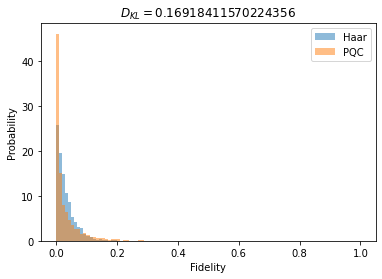

In [14]:
quple.circuit_fidelity_plot(pqc, samples=3000, bins=100)

# Reproducing results from the paper https://arxiv.org/pdf/1905.10876.pdf onn page 5:

* Note that in our case, the Haar distributions are sampled but not analytic

In [15]:
import sympy as sp
# circuit A
cq_A = quple.QuantumCircuit(n_qubit=1)
cq_A.H(0)
cq_A.RZ(sp.Symbol('x'),0)
cq_A

(0, 0): ───H───Rz(x)───

In [16]:
# circuit B
cq_B = quple.QuantumCircuit(n_qubit=1)
cq_B.H(0)
cq_B.RZ(sp.Symbol('x_0'),0)
cq_B.RX(sp.Symbol('x_1'),0)
cq_B

(0, 0): ───H───Rz(x_0)───Rx(x_1)───

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

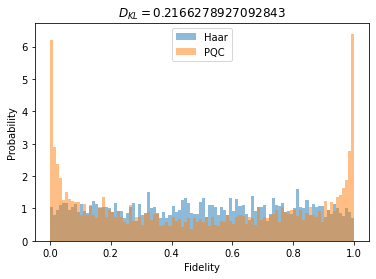

In [17]:
quple.circuit_fidelity_plot(cq_A, samples=3000, bins=100)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

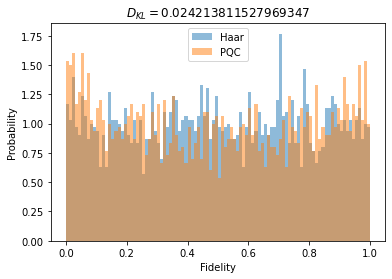

In [18]:
quple.circuit_fidelity_plot(cq_B, samples=3000, bins=100)